In [1]:
# Dataset - https://www.kaggle.com/datasets/danielgrijalvas/movies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/movies/movies.csv


In [57]:
df = pd.read_csv('/kaggle/input/movies/movies.csv')

In [58]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [60]:
# Checking for duplicates
duplicates = df[df.duplicated()]
duplicates

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [61]:
# Checking for nulls
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [62]:
# Data imputation - handling missing values
df['score'].fillna(df['score'].mean(),inplace=True)
df['runtime'].fillna(df['runtime'].mean(),inplace=True)
df['budget'].fillna(df['budget'].mean(),inplace=True)
df['gross'].fillna(df['gross'].mean(),inplace=True)
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [63]:
df = df.sort_values(by=['gross'],inplace=False,ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [80]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6)

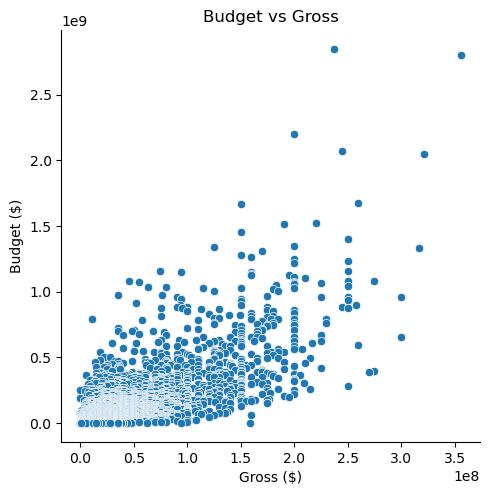

In [74]:
# hypothesis : higher budget -> higher gross
sns.relplot(x='budget',y='gross',data=df)
plt.xlabel('Gross ($)')
plt.ylabel('Budget ($)')
plt.title('Budget vs Gross')
plt.show()

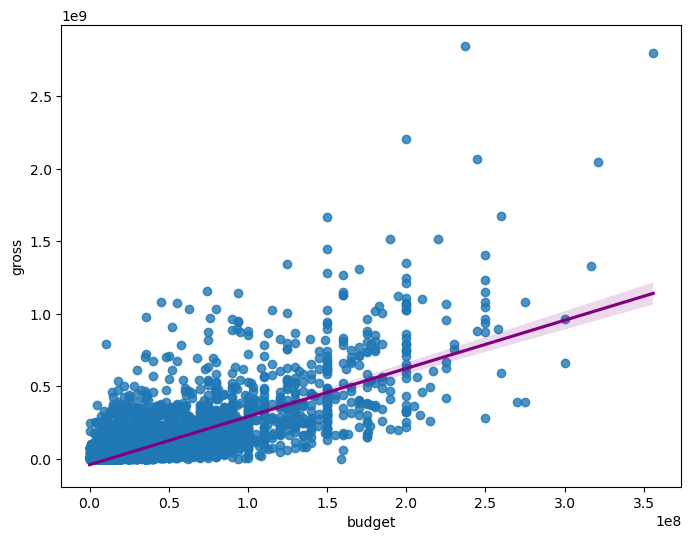

In [81]:
sns.regplot(x='budget',y='gross', data=df, line_kws={"color": "purple"})
plt.show()
#there exists a positive correlation between budget and gross

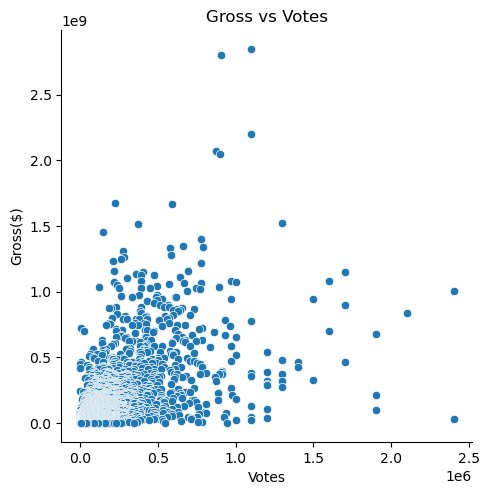

In [82]:
# hypothesis - higher voted movies will have a higher gross earning
sns.relplot(x='votes',y='gross',data=df)
plt.xlabel('Votes')
plt.ylabel('Gross($)')
plt.title('Gross vs Votes')
plt.show()

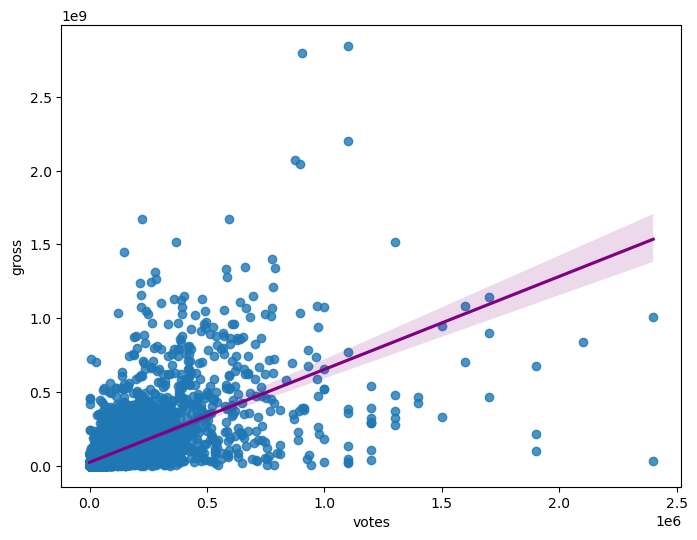

In [83]:
sns.regplot(x='votes',y='gross', data=df, line_kws={"color": "purple"})
plt.show()
#there exists a positive correlation between gross and votes

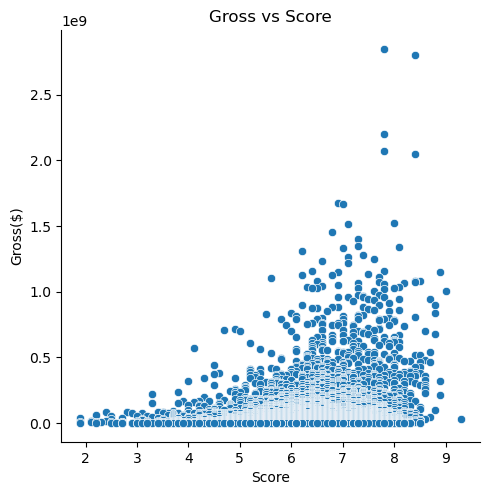

In [84]:
# hypothesis - higher scored movies will have a higher gross earning
sns.relplot(x='score',y='gross',data=df)
plt.xlabel('Score')
plt.ylabel('Gross($)')
plt.title('Gross vs Score')
plt.show()

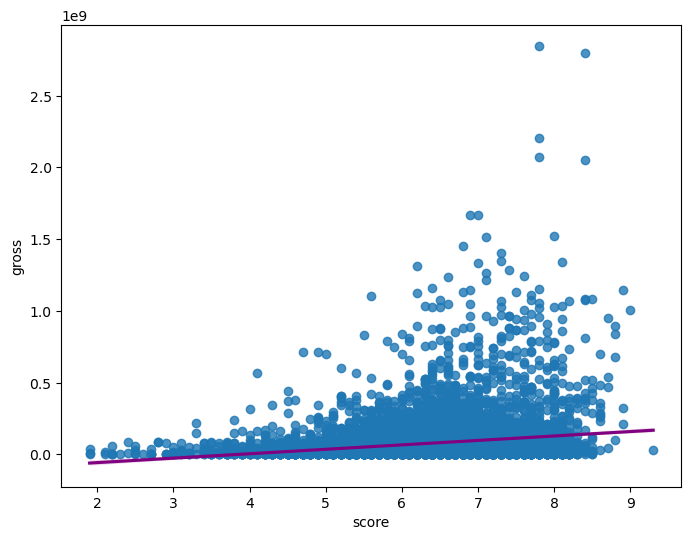

In [85]:
sns.regplot(x='score',y='gross', data=df, line_kws={"color": "purple"})
plt.show()
#The gross earning and score are weakly correlated

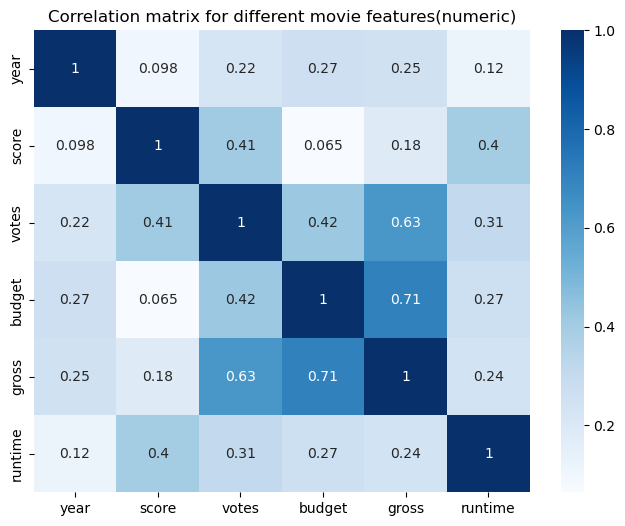

In [89]:
#Pearson Correlation
#correlation matrix visualisation
cmat = df.corr(method="pearson")
sns.heatmap(cmat, annot = True, cmap="Blues")
plt.title('Correlation matrix for different movie features(numeric)')
plt.show()

In [100]:
cmat = cmat.unstack()
sorted_cmat = cmat.sort_values()
high_corr = sorted_cmat[sorted_cmat>0.5]
pd.set_option('display.max_rows',None)
high_corr

gross    votes      0.628713
votes    gross      0.628713
budget   gross      0.711270
gross    budget     0.711270
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64